# Concrete Compressive Strength Data Set

In [50]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Processing

In [51]:
#Import dataset
dataset = pd.read_excel('Concrete_Data.xls')
dataset

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [52]:
#X: read all but "Concrete compressive strength(MPa, megapascals) "
#Y: read only "Concrete compressive strength(MPa, megapascals) "
X = dataset.iloc[:, :-1].values
y = dataset['Concrete compressive strength(MPa, megapascals) '].values
print(X.shape)
print(y.shape)

(1030, 8)
(1030,)


In [53]:
#Split the dataset into 25% test_size and 75% training_size
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [54]:
#Apply feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Linear Regression

In [55]:
#Train the linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [56]:
#Predict the test set
y_pred_lr = lr.predict(X_test)
print(y_pred_lr)

[39.53843768 14.34936935 61.32832879 54.05007279 24.44915798 53.61997349
 46.00051449 27.31365368 53.24118522 37.08105655 16.76179008 39.43023473
 29.6966645  35.88590096 47.62603924 56.72190875 35.78190854 29.36761054
 48.69748598 35.32244755 53.80778592 32.10885773 33.05096622 48.24665201
 23.62225918 23.53937775 69.39968359 26.75217056 56.71244997 48.22144978
 18.97357322 36.44825335 17.4285217  19.52169369 24.61424879 15.28979022
 53.16913952 28.15591384 27.19467207 26.31444139 52.52817644 30.42589129
 25.77210551 35.57602364 53.79739874 53.99405466 30.44610229 44.14685805
 27.16218277 57.07678358 36.70617404 19.12163292 23.21407155 34.65583817
 43.69103509 47.45991463 35.93732188 53.14357884 59.96760476 36.64290334
 31.15917378 20.62564021 50.82298208 55.58817946 20.68127714 44.27517256
 33.2676485  34.19515444 19.361089   20.12735612 28.49751098 27.89770398
 54.44488863 19.5352411  36.53939716 50.74835865 28.22825185 19.21291633
 23.92639344 28.13621474 18.13588062 44.69161101 33

In [57]:
#Determine coefficient and intercept
coefficients = lr.coef_
intercept = lr.intercept_
print('The coefficient is {} and the interception is {}'.format(coefficients[0], intercept))

The coefficient is 12.791717393192487 and the interception is 36.24791144116473


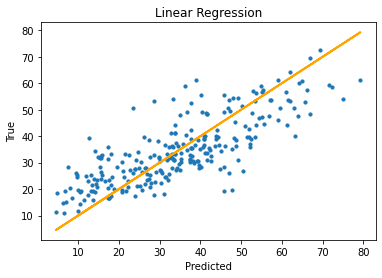

In [58]:
#Plot the predictions
plt.scatter(y_test, y_pred_lr, s=10)
plt.plot(y_test, y_test, c='orange', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Linear Regression")
plt.show()

In [59]:
#Get RMSE, R2
from sklearn.metrics import mean_squared_error, r2_score
rmse = mean_squared_error(y_test, y_pred_lr, squared=False)
r2 = r2_score(y_test, y_pred_lr)
print("Root mean squared error:", rmse)
print("R2 score:", r2)

Root mean squared error: 9.793065711860159
R2 score: 0.6234144623633202


In [60]:
#Gather results into a dataframe
results = pd.DataFrame([['LinearRegression', rmse, r2]],
               columns = ['Model', 'RMSE', 'R2-Score'])

# Ridge Regression

In [61]:
#Determines the best hyperparameters
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import decimal

def float_range(start, stop, step):
    while start < stop:
        yield float(start)
        start += decimal.Decimal(step)

params = {'alpha': list(float_range(0, 1, '0.1'))}
grid_search_cv = GridSearchCV(Ridge(), params,  refit = False)
grid_search_cv.fit(X_train, y_train)
grid_search_cv.best_params_

{'alpha': 0.7}

In [62]:
#Train the linear regression model
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.7, random_state=0)
ridge.fit(X_train, y_train)

Ridge(alpha=0.7, random_state=0)

In [63]:
#Predict the test set
y_pred_ridge = ridge.predict(X_test)
print(y_pred_ridge)

[39.43094198 14.38844603 61.25676032 54.01234549 24.4638856  53.66817512
 46.12906097 27.32363292 53.26018911 37.16208044 16.84285299 39.41965074
 29.61946532 35.81602099 47.66303405 56.72139156 35.77743464 29.3897089
 48.67221669 35.26896209 53.69417063 32.15057582 33.02664803 48.22222623
 23.66505745 23.57770794 69.43504054 26.75399475 56.71193677 48.20238425
 19.01945022 36.55590628 17.48092127 19.62291579 24.67465563 15.3524759
 53.21818466 28.13327874 27.20376959 26.28127471 52.43183883 30.50803198
 25.84301411 35.5178123  53.89477281 53.95487754 30.47933002 44.0585999
 27.26422545 57.09508495 36.78700084 19.16657017 23.2419153  34.56936038
 43.61764059 47.33772533 35.99677633 53.14914428 59.91725114 36.71253168
 31.2008846  20.5618285  50.74642202 55.60171172 20.67853901 44.3579274
 33.28041787 34.22051631 19.4715086  20.19247125 28.50738207 27.899638
 54.404868   19.60704108 36.50596935 50.75901796 28.20193638 19.26063709
 23.97197473 28.12517227 18.34528817 44.64939149 33.18433

In [64]:
#Determine coefficient and intercept
coefficients = ridge.coef_
intercept = ridge.intercept_
print('The coefficient is {} and the interception is {}'.format(coefficients[0], intercept))

The coefficient is 12.61556480608036 and the interception is 36.24791144116474


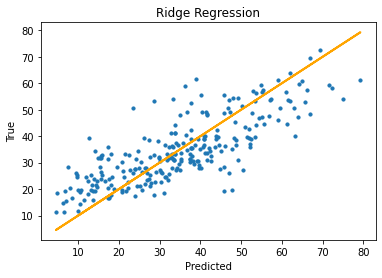

In [65]:
#Plot the predictions
plt.scatter(y_test, y_pred_ridge, s=10)
plt.plot(y_test, y_test, c='orange', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Ridge Regression")
plt.show()

In [66]:
#Get RMSE, R2
from sklearn.metrics import mean_squared_error, r2_score
rmse = mean_squared_error(y_test, y_pred_ridge, squared=False)
r2 = r2_score(y_test, y_pred_ridge)
print("Root mean squared error:", rmse)
print("R2 score:", r2)

Root mean squared error: 9.788386917725527
R2 score: 0.6237742159589177


In [67]:
#Gather results into a dataframe
model_results = pd.DataFrame([['RidgeRegression', rmse, r2]],
                    columns = ['Model', 'RMSE', 'R2-Score'])
results = results.append(model_results, ignore_index = True)

# Support Vector Machines

In [68]:
#Train the support vector regression model
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [69]:
#Predict the test set
y_pred_svr = svr.predict(X_test)
print(y_pred_svr)

[39.76367592 19.68126766 64.91880806 42.72143903 24.83612266 45.16504636
 48.58334904 28.8272738  46.90700448 45.02098399 19.66869799 44.57113141
 30.52835867 30.0095802  47.87150349 54.84500259 36.3157795  33.32365794
 43.55933413 34.70502797 51.62501521 39.67054932 29.70960009 43.28554956
 20.71826948 21.92470594 45.61456902 27.72489878 54.84336658 54.02305187
 19.1802887  43.55772095 20.41629514 32.39538437 23.30236931 15.47368525
 44.89586274 29.34378959 29.63168335 28.56016581 51.27596287 37.82204064
 30.97155711 31.93780042 44.74236264 51.19368456 29.2041779  41.6237636
 36.54993863 41.95081894 40.91453076 21.39310536 30.14816904 39.07547554
 44.30246996 42.25869972 36.15958058 50.43115677 57.11105177 37.73299416
 31.32052293 19.40798087 44.04346462 45.04354092 16.79220203 45.34950359
 34.72667724 31.76641905 24.7504156  19.36935161 28.39994263 30.12742557
 51.71120619 22.95354252 32.12901623 46.65791143 26.62582252 20.0328795
 26.7951954  31.16285367 21.60504219 49.86609326 31.1

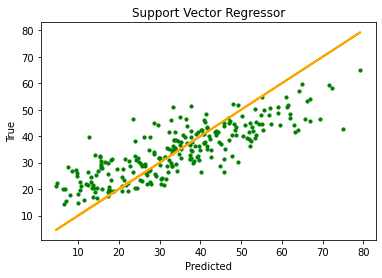

In [70]:
#Plot the predictions
plt.scatter(y_test, y_pred_svr, c='green', s=10)
plt.plot(y_test, y_test, c='orange', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Support Vector Regressor")
plt.show()

In [71]:
#Get RMSE, R2
from sklearn.metrics import mean_squared_error, r2_score
rmse = mean_squared_error(y_test, y_pred_svr, squared=False)
r2 = r2_score(y_test, y_pred_svr)
print("Root mean squared error:", rmse)
print("R2 score:", r2)

Root mean squared error: 9.477665379964764
R2 score: 0.6472808470962687


In [72]:
#Gather results into a dataframe
model_results = pd.DataFrame([['SupportVectorRegression', rmse, r2]],
                    columns = ['Model', 'RMSE', 'R2-Score'])
results = results.append(model_results, ignore_index = True)

# Support Vector Machines (Tuned Hyperparameters)

In [73]:
#Determines the best hyperparameters
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import decimal

def float_range(start, stop, step):
    while start < stop:
        yield float(start)
        start += decimal.Decimal(step)

params = {'kernel':['linear', 'poly', 'rbf'], 'C': list(range(1, 10)), 'gamma':['auto'], 'epsilon': list(float_range(0, 1, '0.1'))}
grid_search_cv = GridSearchCV(SVR(), params,  refit = False)
grid_search_cv.fit(X_train, y_train)
grid_search_cv.best_params_

{'C': 9, 'epsilon': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}

In [74]:
#Train the support vector regression model
from sklearn.svm import SVR
svr = SVR(kernel='rbf', C=9, gamma='auto', epsilon=0.1)
svr.fit(X_train, y_train)

SVR(C=9, gamma='auto')

In [75]:
#Predict the test set
y_pred_svr = svr.predict(X_test)
print(y_pred_svr)

[38.09207037 12.07027575 79.39672748 50.83254573 16.95461115 48.67159975
 56.76599138 22.71163746 62.3288842  49.86646056 17.85074166 48.79354597
 34.30199796 18.5996244  49.52326921 57.74922164 31.03798615 34.63346548
 54.871657   35.44428798 57.37017186 28.17665202 29.69766292 54.02270563
 18.80830323 23.09202089 55.140137   22.361091   57.76389016 68.76934419
 18.33498826 49.72130721 19.34156171 36.04290416 21.65862023  9.35840415
 47.97128217 24.6586733  23.65379991 26.08043331 54.12951337 42.34554795
 27.67318107 34.4138296  60.01057974 48.05091224 27.00994024 45.02556069
 35.00941506 50.4605105  42.8490729  21.39532305 25.61630684 41.81014657
 53.45554559 42.32281341 38.94150193 48.82758894 62.2864455  43.99418836
 33.88692697 17.67712915 47.19227869 51.1877548  11.95111489 50.22458238
 37.83139722 25.95521395 13.2912473  16.71443588 21.550777   26.18212583
 49.3012045  19.63269287 30.46356713 38.74059651 28.24787423 13.51647705
 27.56063958 33.08977502 18.21956858 54.54297787 27

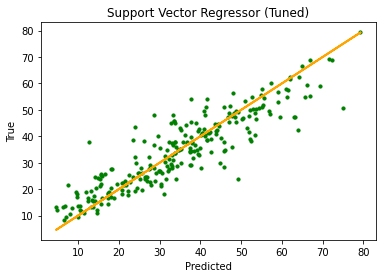

In [76]:
#Plot the predictions
plt.scatter(y_test, y_pred_svr, c='green', s=10)
plt.plot(y_test, y_test, c='orange', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Support Vector Regressor (Tuned)")
plt.show()

In [77]:
#Get RMSE, R2
from sklearn.metrics import mean_squared_error, r2_score
rmse = mean_squared_error(y_test, y_pred_svr, squared=False)
r2 = r2_score(y_test, y_pred_svr)
print("Root mean squared error:", rmse)
print("R2 score:", r2)

Root mean squared error: 6.966603966542865
R2 score: 0.8094238515827217


In [78]:
#Gather results into a dataframe
model_results = pd.DataFrame([['TunedSupportVectorRegression', rmse, r2]],
                    columns = ['Model', 'RMSE', 'R2-Score'])
results = results.append(model_results, ignore_index = True)

# Neural Network

In [79]:
#Split the dataset into 25% test set and 75% training set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [80]:
#Apply feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [81]:
#Initialising the ANN
from keras.models import Sequential
ann = Sequential()

In [82]:
from keras.layers import Dense, BatchNormalization
#Input layer and first hidden layer
ann.add(Dense(units=32, kernel_initializer = 'uniform', activation='relu', input_dim=8))
#hidden layers
ann.add(Dense(units=16, kernel_initializer = 'uniform', activation='relu'))
ann.add(BatchNormalization())
#Output layer
ann.add(Dense(units=1, activation='linear'))

In [83]:
#Compile the model
ann.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mse'])

In [84]:
#Fit the model
ann.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
78/78 [==============================] - 1s 1ms/step - loss: 1541.0994 - mse: 1541.0994
Epoch 2/100
78/78 [==============================] - 0s 953us/step - loss: 1411.3607 - mse: 1411.3607
Epoch 3/100
78/78 [==============================] - 0s 979us/step - loss: 1301.0294 - mse: 1301.0294
Epoch 4/100
78/78 [==============================] - 0s 998us/step - loss: 1181.7175 - mse: 1181.7175
Epoch 5/100
78/78 [==============================] - 0s 940us/step - loss: 1054.7075 - mse: 1054.7075
Epoch 6/100
78/78 [==============================] - 0s 1ms/step - loss: 921.5005 - mse: 921.5005
Epoch 7/100
78/78 [==============================] - 0s 953us/step - loss: 786.7272 - mse: 786.7272
Epoch 8/100
78/78 [==============================] - 0s 1ms/step - loss: 670.2852 - mse: 670.2852
Epoch 9/100
78/78 [==============================] - 0s 1ms/step - loss: 534.2682 - mse: 534.2682
Epoch 10/100
78/78 [==============================] - 0s 973us/step - loss: 435.9353 - mse: 435.93

In [85]:
#Get the generalization error
ann.evaluate(X_test, y_test)

9/9 [==============================] - 0s 930us/step - loss: 34.4535 - mse: 34.4535


[34.45354461669922, 34.45354461669922]

In [86]:
#Predict the test set
y_pred_ann = ann.predict(X_test)

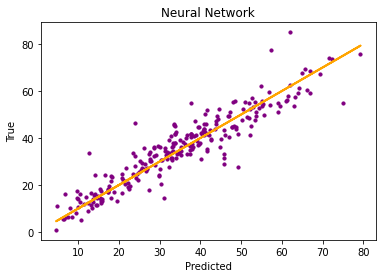

In [87]:
#Plot the predictions
plt.scatter(y_test, y_pred_ann, c='purple', s=10)
plt.plot(y_test, y_test, c='orange', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Neural Network")
plt.show()

In [88]:
#Get RMSE, R2
from sklearn.metrics import mean_squared_error, r2_score
rmse = mean_squared_error(y_test, y_pred_ann, squared=False)
r2 = r2_score(y_test, y_pred_ann)
print("Root mean squared error:", rmse)
print("R2 score:", r2)

Root mean squared error: 5.8697143336749855
R2 score: 0.8647117025891856


In [89]:
#Gather results into a dataframe
model_results = pd.DataFrame([['NeuralNetwork', rmse, r2]],
                    columns = ['Model', 'RMSE', 'R2-Score'])
results = results.append(model_results, ignore_index = True)
results

,Model,RMSE,R2-Score
0,LinearRegression,9.793066,0.623414
1,RidgeRegression,9.788387,0.623774
2,SupportVectorRegression,9.477665,0.647281
3,TunedSupportVectorRegression,6.966604,0.809424
4,NeuralNetwork,5.869714,0.864712
